In [1]:
# import the libraries we will be working with today
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data 
audio_data = pd.read_csv("../../02Lecture/data/audio_data.csv")
# preview the first five rows
audio_data.head()

,audio_file_name,zero_crossing_rate,energy,duration
0,classical1.wav,35019,33.268707,29.976961
1,marlene.wav,53817,52.843853,29.976961
2,hendrix.wav,62196,75.526360,29.976961
3,beatles.wav,23928,84.270905,29.976961
4,birdland.wav,77597,111.841644,29.976961


In [3]:
type(audio_data)

pandas.core.frame.DataFrame

In [4]:
audio_data = audio_data.set_index("audio_file_name")
audio_data.head()

,zero_crossing_rate,energy,duration
audio_file_name,,,
classical1.wav,35019,33.268707,29.976961
marlene.wav,53817,52.843853,29.976961
hendrix.wav,62196,75.526360,29.976961
beatles.wav,23928,84.270905,29.976961
birdland.wav,77597,111.841644,29.976961


In [5]:
# size of data
audio_data.shape

# number of rows and columns

(30, 3)

In [6]:
audio_data.shape[1]

3

In [7]:
# number of audio files

print("# of audio files in the data folder:", audio_data.shape[0])

# of audio files in the data folder: 30


In [8]:
audio_data.describe()

,zero_crossing_rate,energy,duration
count,30.000000,30.000000,3.000000e+01
mean,53244.666667,69.388468,2.997696e+01
std,23387.692291,28.040582,7.226896e-15
min,20191.000000,21.675022,2.997696e+01
25%,40096.750000,51.160083,2.997696e+01
50%,47939.500000,66.182312,2.997696e+01
75%,61957.500000,83.452192,2.997696e+01
max,126961.000000,129.563293,2.997696e+01


In [9]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, classical1.wav to winds.wav
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   zero_crossing_rate  30 non-null     int64  
 1   energy              30 non-null     float64
 2   duration            30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 960.0+ bytes


In [10]:
# can do some basic exploration
pd.set_option('display.float_format', lambda x: '%.5f' % x)

audio_data.describe()

# question: what does the describe function tell us about the features?
# question: what about the scale?

,zero_crossing_rate,energy,duration
count,30.00000,30.00000,30.00000
mean,53244.66667,69.38847,29.97696
std,23387.69229,28.04058,0.00000
min,20191.00000,21.67502,29.97696
25%,40096.75000,51.16008,29.97696
50%,47939.50000,66.18231,29.97696
75%,61957.50000,83.45219,29.97696
max,126961.00000,129.56329,29.97696


In [11]:
# question: what is the average zero cross rate?

audio_data.zero_crossing_rate.mean()

53244.666666666664

In [12]:
# question: what is the average energy?

In [13]:
# question: what is the average duration?

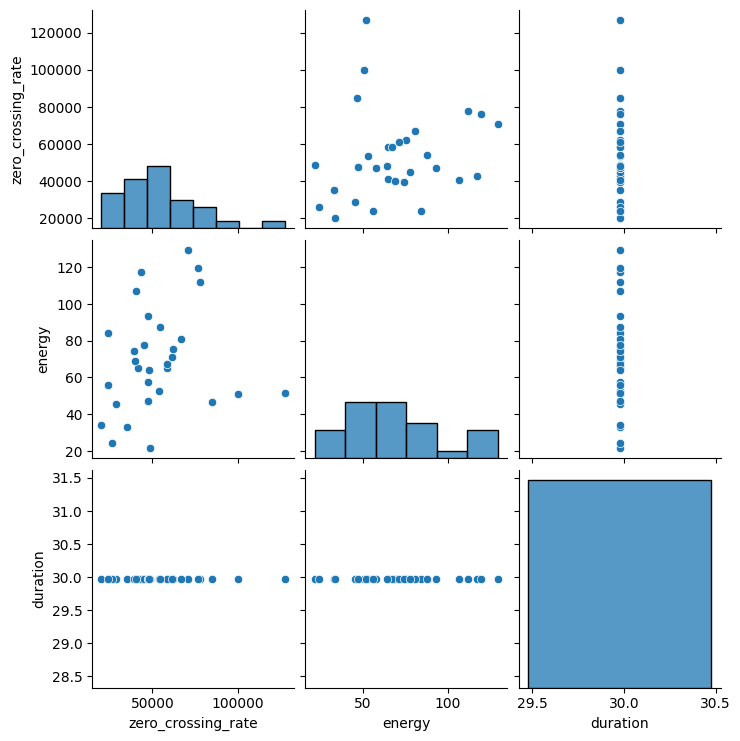

In [14]:
# visualise the data
sns.pairplot(audio_data);

In [15]:
# correlations between the different variables

audio_data.corr(numeric_only=True)

,zero_crossing_rate,energy,duration
zero_crossing_rate,1.00000,0.17863,NaN
energy,0.17863,1.00000,NaN
duration,NaN,NaN,NaN


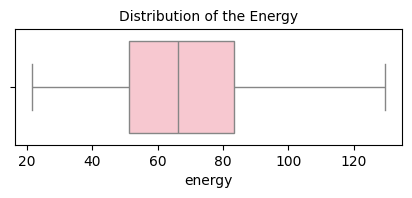

In [16]:
plt.rcParams['figure.figsize']=(5, 1.5) # size of plots

sns.boxplot(x = audio_data.energy, color="pink")
plt.title("Distribution of the Energy", size=10);

# question: where is the min, maximum and median energy?

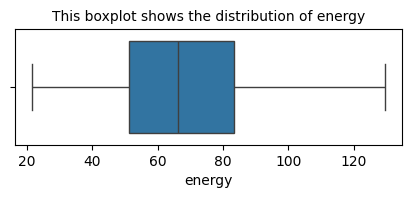

In [17]:
sns.boxplot(x=audio_data.energy)
plt.title("This boxplot shows the distribution of energy", size=10);

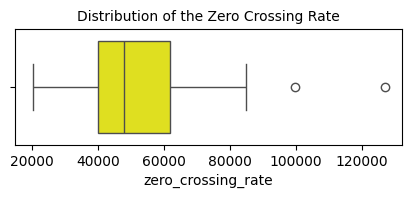

In [18]:
# visualise the distribution of zero crossing rate for all the audio data files

sns.boxplot(x = audio_data.zero_crossing_rate, color='yellow')
plt.title("Distribution of the Zero Crossing Rate", size=10);

# question: where do you see the zero crossing rate peaking?
# violion plots combine distribution of data and box plots

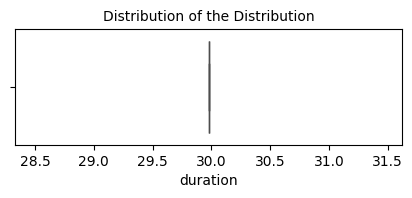

In [19]:
# visualise the distribution of zero crossing rate for all the audio data files

sns.boxplot(x = audio_data.duration, color='yellow')
plt.title("Distribution of the Distribution", size=10);

# question: where do you see the zero crossing rate peaking?
# violion plots combine distribution of data and box plots

In [20]:
# question: how would you "cluster" the audio data?

In [21]:
# question: what is the standard deviation for duration? 

audio_data.duration.describe()

count   30.00000
mean    29.97696
std      0.00000
min     29.97696
25%     29.97696
50%     29.97696
75%     29.97696
max     29.97696
Name: duration, dtype: float64

In [22]:
# check for any missing data

audio_data.isnull().sum()

zero_crossing_rate    0
energy                0
duration              0
dtype: int64

In [23]:
# check for duplicates

audio_data.duplicated().sum()

0

## Data Cleaning and Processing

In [24]:
# we will drop the duration variable 
# as this is an example of a redundant feature

audio_data.drop(["duration"], axis=1, inplace=True)

In [25]:
audio_data.head()

,zero_crossing_rate,energy
audio_file_name,,
classical1.wav,35019,33.26871
marlene.wav,53817,52.84385
hendrix.wav,62196,75.52636
beatles.wav,23928,84.27090
birdland.wav,77597,111.84164


When exploring the data, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

In [26]:
from sklearn.preprocessing import MinMaxScaler # library to scale the data

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) 
# the MinMax Scaler, transforms the data between -1 and 1
audio_data_scaled = min_max_scaler.fit_transform(audio_data) # scales the data frame

In [27]:
audio_data_scaled # the scaled data

array([[-0.72224408, -0.78507979],
       [-0.37012269, -0.42220168],
       [-0.21316849, -0.00172027],
       [-0.92999906,  0.16038345],
       [ 0.07532078,  0.67148145],
       [ 0.21084574, -0.5335637 ],
       [ 0.49008148, -0.45637922],
       [-0.46565515, -1.        ],
       [-0.05582092,  1.        ],
       [-0.603353  , -0.19749244],
       [-0.83916831, -0.56235001],
       [-0.28388124, -0.19418775],
       [-0.12662733,  0.0996753 ],
       [-0.62925916, -0.12299232],
       [ 1.        , -0.44452196],
       [-0.28642877, -0.15568701],
       [-0.23103868, -0.08272524],
       [-1.        , -0.77242139],
       [-0.64162218, -0.02082637],
       [-0.48491149, -0.529821  ],
       [-0.57119041,  0.77024116],
       [-0.62073616,  0.57834081],
       [-0.53829727,  0.0375029 ],
       [ 0.05125035,  0.81403539],
       [-0.88436827, -0.95401977],
       [-0.49182355, -0.33549752],
       [-0.49476445,  0.32533786],
       [-0.92951204, -0.36468019],
       [-0.36328557,

In [28]:
from sklearn.cluster import KMeans # import k-means algorithm

model = KMeans(n_clusters=2) # select a k to initially cluster the data
model

KMeans(n_clusters=2)

In [29]:
! pip3 install scikit-learn

In [30]:
labels = model.fit_predict(audio_data_scaled) # predict clusters for the data

In [31]:
# print the labels

labels

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0], dtype=int32)

In [32]:
from collections import Counter # for specialised data types

Counter(labels)

# how many audio files have we classified as 0 and 1?

Counter({0: 20, 1: 10})

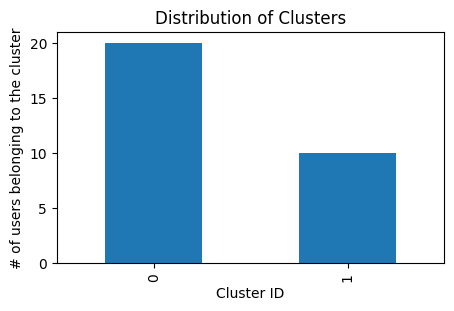

In [33]:
plt.rcParams['figure.figsize']=(5, 3)


pd.DataFrame(Counter(labels).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

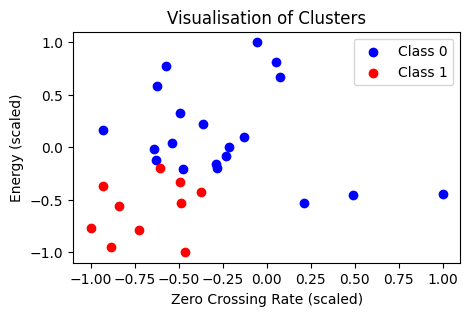

In [34]:
plt.scatter(audio_data_scaled[labels==0,0], audio_data_scaled[labels==0,1], c='b')
plt.scatter(audio_data_scaled[labels==1,0], audio_data_scaled[labels==1,1], c='r')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2', 'Class 3'))
plt.title("Visualisation of Clusters");

In [35]:
print("The centroids for the clusters")

pd.DataFrame(model.cluster_centers_, columns = audio_data.columns)

The centroids for the clusters


,zero_crossing_rate,energy
0,-0.23171,0.12292
1,-0.67912,-0.59236


## K-Means Clustering Algorithm, optimal clusters

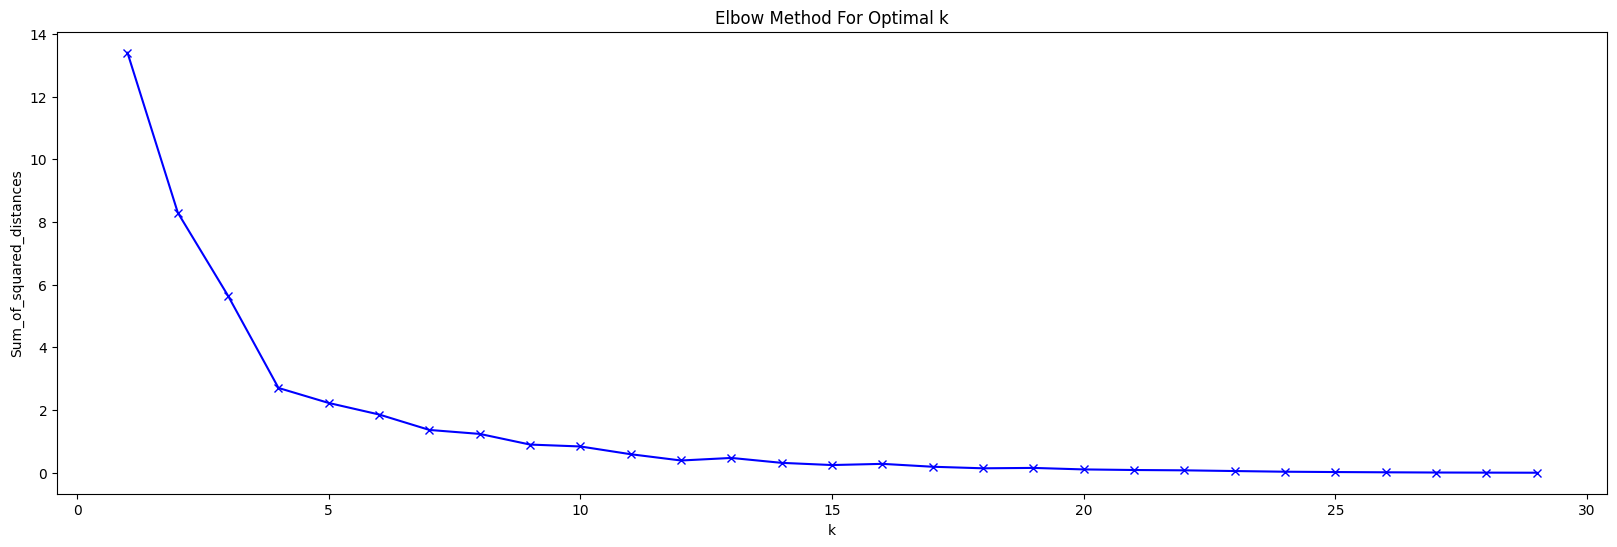

In [36]:
# identify optimal number of clusters

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.optimal_number_clusters import optimal_number_clusters
import warnings
warnings.filterwarnings('ignore')

optimal_number_clusters(audio_data_scaled)

# question: what is the optimal number of clusters?
# hint: it is where the elbow starts to form, and we see the change in SSE becoming consistent 

In [37]:
optimal_k = 4

model = KMeans(n_clusters=optimal_k) # select a k to initially cluster the data

labels = model.fit_predict(audio_data_scaled)

In [38]:
Counter(labels)

Counter({2: 15, 0: 7, 1: 5, 3: 3})

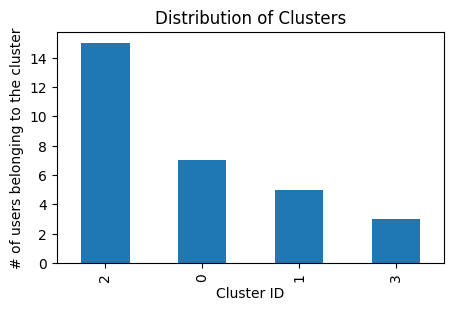

In [39]:
plt.rcParams['figure.figsize']=(5, 3)


pd.DataFrame(Counter(labels).most_common()).set_index(0).plot.bar(legend=None)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster');

In [40]:
print("The centroids for the clusters")

pd.DataFrame(model.cluster_centers_, columns = audio_data.columns)

The centroids for the clusters


,zero_crossing_rate,energy
0,-0.76084,-0.70977
1,-0.22424,0.76682
2,-0.44528,-0.05976
3,0.56698,-0.47815


## Evaluate the Clusters

Questions about individual clusters:
- How many audio files does your cluster have?
- What is the distribution of energy and zero crossing rate in your specific cluster?
- Does the music in your cluster make sense?

Comparing clusters:
- What is the distribution of energy and zero crossing rate across the different clusters? which cluster has the widest range, highest average energy/zero cross rating?
- how do the clusters behaviour compare to the entire dataset?

In [52]:
# create a dataframe which includes the predicted cluster

labels_df = pd.DataFrame(labels).reset_index(drop = True).rename(columns = {0: "cluster_id"})
labels_df.head()

,cluster_id
0,0
1,2
2,2
3,2
4,1


In [53]:
audio_data_w_labels = pd.concat([audio_data.reset_index(), labels_df], axis= 1 ) 
audio_data_w_labels.head()

,audio_file_name,zero_crossing_rate,energy,cluster_id
0,classical1.wav,35019,33.26871,0
1,marlene.wav,53817,52.84385,2
2,hendrix.wav,62196,75.52636,2
3,beatles.wav,23928,84.27090,2
4,birdland.wav,77597,111.84164,1


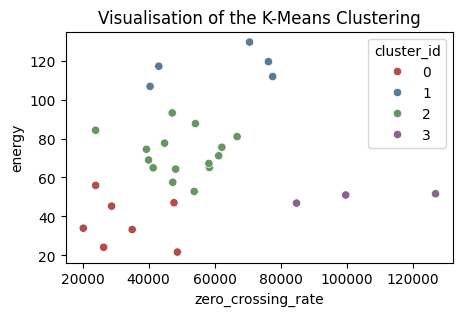

In [65]:
cmap = sns.color_palette("Set1", n_colors = optimal_k, desat = .5)

sns.scatterplot(x='zero_crossing_rate', y='energy', hue='cluster_id', data=audio_data_w_labels, palette = cmap)
plt.title("Visualisation of the K-Means Clustering");

# what do you think about these clusters?

In [69]:
# identify some samples from cluster 2

cluster_2_audio_files = audio_data_w_labels[audio_data_w_labels.cluster_id == 2]
cluster_2_audio_files

,audio_file_name,zero_crossing_rate,energy,cluster_id
1,marlene.wav,53817,52.84385,2
2,hendrix.wav,62196,75.52636,2
3,beatles.wav,23928,84.27090,2
9,duke.wav,41366,64.96560,2
11,loreena.wav,58421,65.14387,2
12,copland.wav,66816,80.99606,2
13,russo.wav,39983,68.98444,2
15,tony.wav,58285,67.22076,2
16,glass.wav,61242,71.15662,2
18,narch.wav,39323,74.49570,2


In [70]:
cluster_2_audio_files.shape

(15, 4)

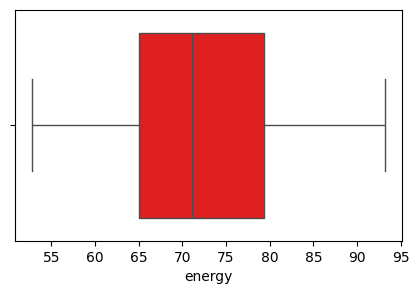

In [79]:
sns.boxplot(x=cluster_2_audio_files.energy, color="red");

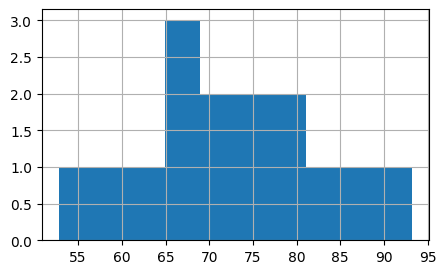

In [77]:
cluster_2_audio_files.energy.hist();

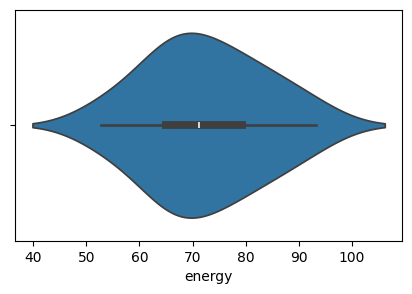

In [78]:
sns.violinplot(x=cluster_2_audio_files.energy);

In [76]:
cluster_2_audio_files.describe()

,zero_crossing_rate,energy,cluster_id
count,15.00000,15.00000,15.00000
mean,49804.73333,72.39567,2.00000
std,11157.06287,11.14446,0.00000
min,23928.00000,52.84385,2.00000
25%,43102.50000,65.05473,2.00000
50%,48190.00000,71.15662,2.00000
75%,58353.00000,79.31914,2.00000
max,66816.00000,93.16923,2.00000


In [61]:
# audio data libraries
import librosa
import IPython.display as ipd # play the audio data

audio_file ='../../01Lecture/data/raw/birdland.wav'

#Playing the audio
ipd.Audio(audio_file)

In [62]:
audio_file ='../../01Lecture/data/raw/chaka.wav'

#Playing the audio
ipd.Audio(audio_file)

In [58]:
cluster_2_audio_files.describe()

# you can also visualise this

,zero_crossing_rate,energy,cluster_id
count,15.00000,15.00000,15.00000
mean,49804.73333,72.39567,2.00000
std,11157.06287,11.14446,0.00000
min,23928.00000,52.84385,2.00000
25%,43102.50000,65.05473,2.00000
50%,48190.00000,71.15662,2.00000
75%,58353.00000,79.31914,2.00000
max,66816.00000,93.16923,2.00000


In [59]:
audio_data_w_labels.set_index('audio_file_name').groupby(["cluster_id"]).agg(['min', 'max', 'mean', 'count'])


zero_crossing_rate                               energy            \
                          min     max         mean count       min       max   
cluster_id                                                                     
0                       20191   48717  32958.71429     7  21.67502  55.94680   
1                       40438   77597  61605.20000     5 106.81725 129.56329   
2                       23928   66816  49804.73333    15  52.84385  93.16923   
3                       84832  126961 103844.00000     3  46.83652  51.63980   

                            
                mean count  
cluster_id                  
0           37.33137     7  
1          116.98459     5  
2           72.39567    15  
3           49.82550     3

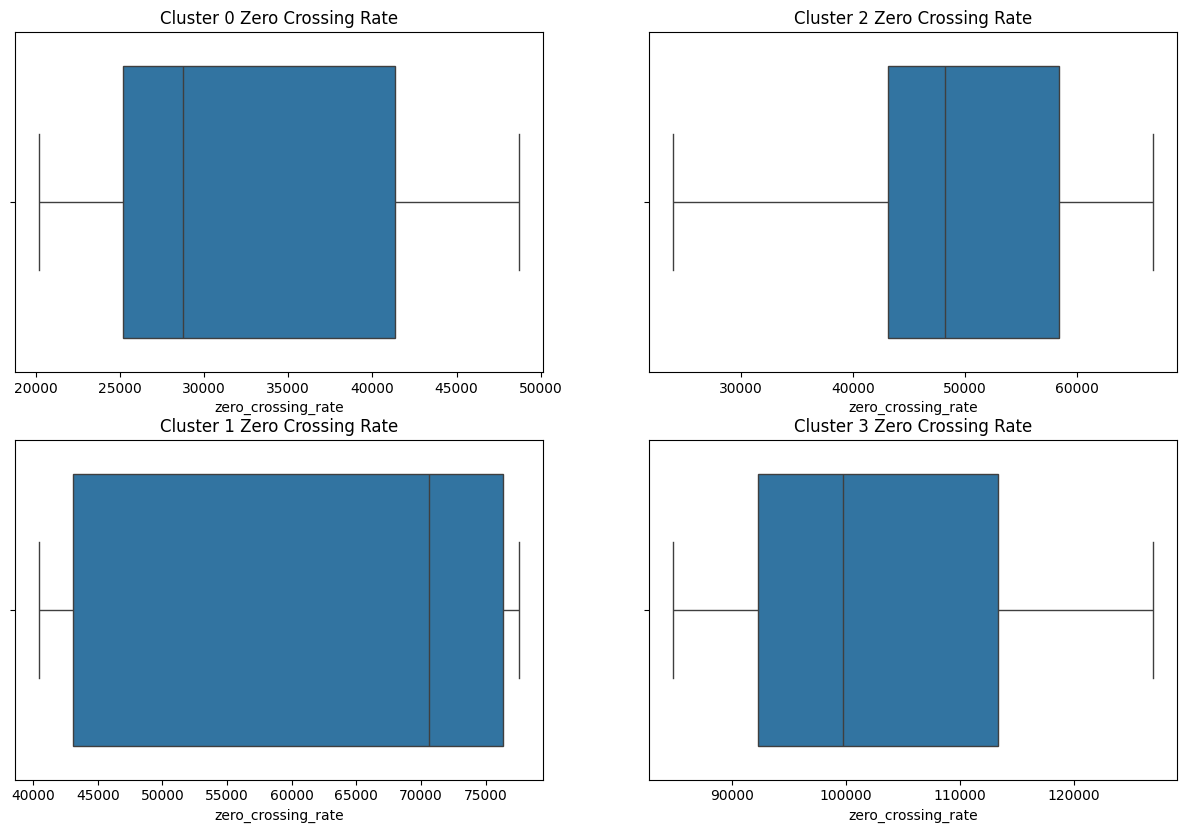

In [50]:
# Distibution of Zero Crossing Rate

clusters = audio_data_w_labels["cluster_id"].unique() 

x = 1
plt.figure(figsize=(15, 15))
for x, c in enumerate(clusters):
    ax = plt.subplot(3, 2, x + 1)
    plt.title(f'Cluster {c} Zero Crossing Rate')
    sns.boxplot(x = audio_data_w_labels[audio_data_w_labels["cluster_id"] == c]["zero_crossing_rate"])

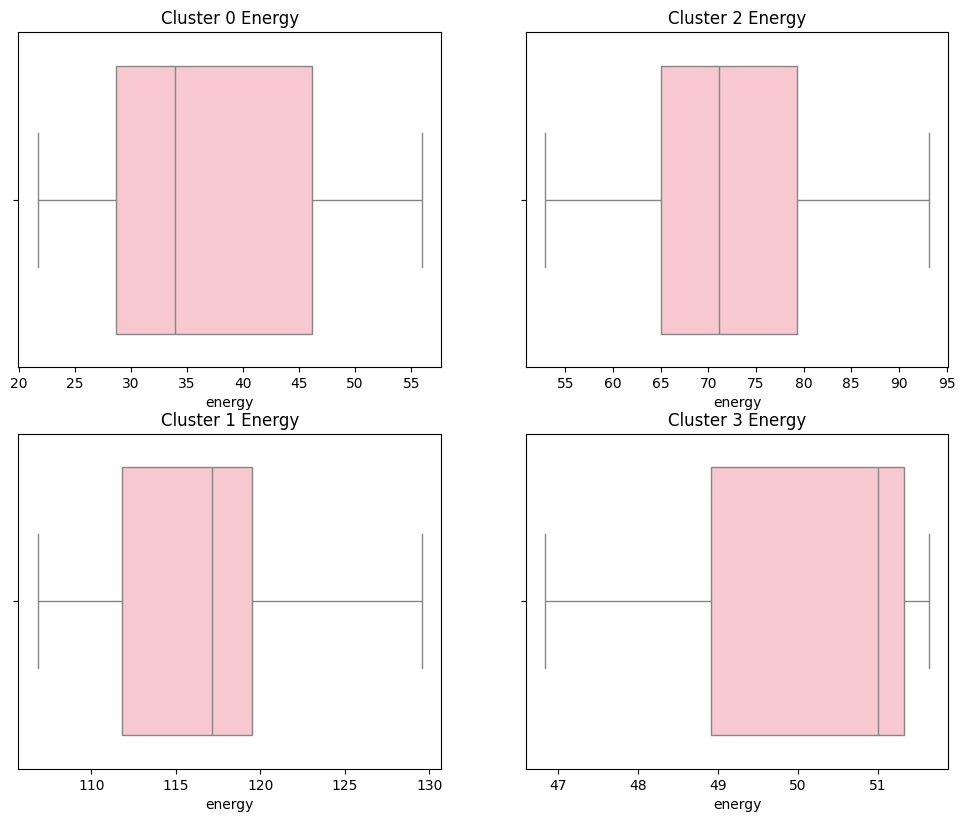

In [64]:
# Distibution of Energy


clusters = audio_data_w_labels["cluster_id"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Energy')
    sns.boxplot(x = audio_data_w_labels[audio_data_w_labels["cluster_id"] == c]["energy"], color='pink')